In [40]:
from decouple import config
import numpy as np
from os import path
import pandas as pd
import praw
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reddit = praw.Reddit(
    client_id = config("CLIENT_ID"),
    client_secret = config("SECRET"),
    user_agent = config("USER"),
    username = config("USERNAME"),
    password = config("PASSWORD")
)

subreddit = reddit.subreddit("wallstreetbets")

hot_wsb = subreddit.hot(limit=1000)

In [3]:
dict = {"title": [],
        "subreddit": [],
        "score": [],
        "id": [],
        "url": [],
        "comms_num": [],
        "created": [],
        "body": []}

for submission in hot_wsb:
    dict["title"].append(submission.title)
    dict['subreddit'].append(submission.subreddit)
    dict["score"].append(submission.score)
    dict["id"].append(submission.id)
    dict["url"].append(submission.url)
    dict["comms_num"].append(submission.num_comments)
    dict["created"].append(submission.created)
    dict["body"].append(submission.selftext)
    
df = pd.DataFrame(dict)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

In [4]:
# function that cleans the text in the submission
def clean_submission(text):
    text = text.lower()
    text = ' '.join(
        re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t'])|(\w+:\/\/\S+)", " ", text).split())
    return text

In [5]:
# applying clean submission function to the title and body columns
df['title'] = df['title'].apply(lambda x: clean_submission(x))
df['body'] = df['body'].apply(lambda x: clean_submission(x))

body_text = " ".join(body for body in df.body)
title_text = " ".join(title for title in df.title) + body_text

stopwords = set(STOPWORDS)
stopwords.add("I'm, It's, s, m")

print(df.shape)
df.head()

(955, 8)


,title,subreddit,score,id,url,comms_num,created,body
0,what are your moves tomorrow february 04 2021,wallstreetbets,3156,lby4jj,https://www.reddit.com/r/wallstreetbets/commen...,19028,1.612415e+09,your daily trading discussion thread please ke...
1,gme overnight thread sec intern meet and greet,wallstreetbets,12363,lbyf09,https://www.reddit.com/r/wallstreetbets/commen...,10738,1.612416e+09,enjoy
2,gme yolo update feb 3 2021 heads up gonna back...,wallstreetbets,87007,lbykxg,https://i.redd.it/93vf02k2wbf61.png,6853,1.612416e+09,
3,if the sec is still here fuck you,wallstreetbets,40493,lby44e,https://www.reddit.com/r/wallstreetbets/commen...,1445,1.612415e+09,that's all you already know as far as values g...
4,couldn t possibly be hedge funds,wallstreetbets,122140,lbwia9,https://i.redd.it/4nd97dz3ibf61.jpg,3904,1.612411e+09,


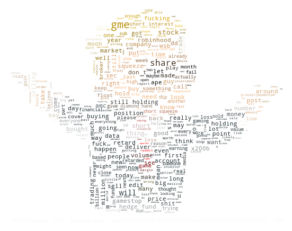

<Figure size 1440x1440 with 0 Axes>

In [82]:
mask = np.array(Image.open("wallstreetbets3.png"))

wc = WordCloud(background_color="white", max_words=3000, mask=mask,
               stopwords=stopwords, max_font_size=20, random_state=42)

# generate word cloud
wc.generate(title_text)

# create coloring from image
image_colors=ImageColorGenerator(mask)



# show
# fig, axes=plt.subplots()
# axes[0].imshow(wc, interpolation = "bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(
    color_func=image_colors), interpolation = "bilinear")
# axes[2].imshow(mask, cmap = plt.cm.gray,
# interpolation = "bilinear")
plt.axis('off')
plt.figure(figsize=(20, 20))
wc.to_file('wordcloud.png')